# Import libraries

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice?!)
MODEL_DIR = Path().resolve().parent / "KuehnEtAl2023"
sys.path.append(str(MODEL_DIR))

import run_probability_exceedance

# View the docstrings

In [3]:
help(run_probability_exceedance)

Help on module run_probability_exceedance:

NAME
    run_probability_exceedance

DESCRIPTION
    This file runs hazard (probability of exceedance) for the KEA23 displacement model.
    - The results are returned in a pandas DataFrame.
    - Results for the location, its complement, and folded location are always returned.
    - The mean model (i.e., mean coefficients) is run by default, but results for all coefficients can be computed.
    - If full model is run (i.e., `mean_model=False`), then only one scenario is allowed.
    - A scenario is defined as a magnitude-location-style combination.
    - If mean model is run (i.e., `mean_model=True` or default), then any number of scenarios is allowed.
    - Command-line use is supported; try `python run_probability_exceedance.py --help`
    - Module use is supported; try `from run_probability_exceedance import run_probex`
    
    Reference: https://doi.org/10.1177/ToBeAssigned

FUNCTIONS
    main()
    
    run_probex(*, magnitude: Union[

# Run probability of exceedance

## Single scenarios

A single scenario is defined as a magnitude/location/style. Here is an example (note all parameters must be passed as keyword arguments).

In [4]:
displ_array = np.logspace(start=np.log(0.001), stop=np.log(100), num=20, base=np.e)

mag, loc, sof = (
    6.8,
    0.25,
    "strike-slip",
)

results = run_probability_exceedance.run_probex(
    magnitude=mag, location=loc, style=sof, displacement=displ_array
)

results.head()

,magnitude,location,style,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,transformed_displacement,displacement,probex_site,probex_complement,probex_folded
0,6.8,0.25,strike-slip,-1,0.161345,-0.168919,0.832288,-0.448997,0.873626,-4.164563,0.001000,0.999999,0.999989,0.999994
1,6.8,0.25,strike-slip,-1,0.161345,-0.168919,0.832288,-0.448997,0.873626,-3.955730,0.001833,0.999997,0.999970,0.999984
2,6.8,0.25,strike-slip,-1,0.161345,-0.168919,0.832288,-0.448997,0.873626,-3.725448,0.003360,0.999990,0.999912,0.999951
3,6.8,0.25,strike-slip,-1,0.161345,-0.168919,0.832288,-0.448997,0.873626,-3.471515,0.006158,0.999964,0.999730,0.999847
4,6.8,0.25,strike-slip,-1,0.161345,-0.168919,0.832288,-0.448997,0.873626,-3.191503,0.011288,0.999859,0.999153,0.999506


The KEA23 model predicts displacement along the *full* rupture length. As a result, the predicted slip profiles are asymmetrical (and systematically oriented with the peak on the left, i.e. U* <= 0.5). Both the mean $\mu$ and total standard deviation $\sigma_T$ vary with U*; therefore, the hazard will usually need to be considered for the $U_*$ location and its complement $1-U_*$. The final probability of exceedance curve is based on equal weight on each hazard curve (i.e., averaging over rate) for probabilistic evaluations. See the plot below.

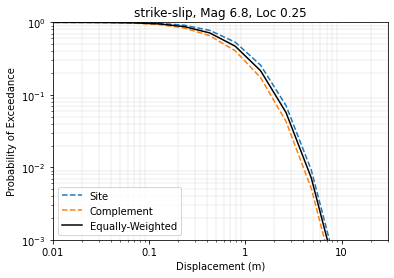

In [5]:
fig, ax = plt.subplots()

ax.plot(
    results["displacement"],
    results["probex_site"],
    label="Site",
    c="tab:blue",
    ls="dashed",
)

ax.plot(
    results["displacement"],
    results["probex_complement"],
    label="Complement",
    c="tab:orange",
    ls="dashed",
)

ax.plot(
    results["displacement"],
    results["probex_folded"],
    label="Equally-Weighted",
    c="k",
    ls="solid",
)

xticks = [0.001, 0.01, 0.1, 1, 10, 100]
ax.set_xticks(xticks)
ax.set(xlim=[0.01, 30], ylim=[1e-3, 1], xscale="log", yscale="log")
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
plt.minorticks_on()
ax.grid(which="minor", axis="both", lw=0.4, alpha=0.5)
ax.set_xlabel("Displacement (m)")
ax.set_ylabel("Probability of Exceedance")
ax.set_title(f"{sof}, Mag {mag}, Loc {loc}")
ax.legend(loc="lower left")

The default uses the mean model coefficients. The full model coefficients can be obtained by setting `mean_model=False`. Here is an example.

In [6]:
results = run_probability_exceedance.run_probex(
    magnitude=mag, location=loc, style=sof, displacement=displ_array, mean_model=False
)

print(f"Number of test displacements: {len(displ_array)}")
print(
    f"Number of models (i.e., correlated coefficients) run: {max(results['model_number'])}"
)
print(f"Number of rows in output dataframe: {len(results)}")

results.head()

Number of test displacements: 20
Number of models (i.e., correlated coefficients) run: 1000
Number of rows in output dataframe: 20000


,magnitude,location,style,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,transformed_displacement,displacement,probex_site,probex_complement,probex_folded
0,6.8,0.25,strike-slip,1,0.153139,-0.317954,0.975245,-0.591263,1.006839,-4.262777,0.001000,0.999974,0.999867,0.999920
1,6.8,0.25,strike-slip,1,0.153139,-0.317954,0.975245,-0.591263,1.006839,-4.042321,0.001833,0.999933,0.999696,0.999814
2,6.8,0.25,strike-slip,1,0.153139,-0.317954,0.975245,-0.591263,1.006839,-3.800430,0.003360,0.999822,0.999282,0.999552
3,6.8,0.25,strike-slip,1,0.153139,-0.317954,0.975245,-0.591263,1.006839,-3.535018,0.006158,0.999514,0.998271,0.998893
4,6.8,0.25,strike-slip,1,0.153139,-0.317954,0.975245,-0.591263,1.006839,-3.243799,0.011288,0.998651,0.995787,0.997219


In [7]:
del fig, ax, xticks, mag, loc, sof, results

## Multiple scenarios

When the mean model coefficients are used, multiple magnitude/location/style scenarios can be run. All combinations of magnitudes, locations, and styles are run. Here is an example.

In [8]:
mag, loc, sof = (
    [6.8],
    [0.25, 0.5],
    ["strike-slip", "reverse", "normal"]
)

results = run_probability_exceedance.run_probex(
    magnitude=mag, location=loc, style=sof, displacement=displ_array, mean_model=True
)

results.head()

,magnitude,location,style,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,transformed_displacement,displacement,probex_site,probex_complement,probex_folded
0,6.8,0.25,normal,-1,0.119203,0.164851,1.004341,-0.960537,1.004341,-4.706882,0.001000,0.999999,0.999904,0.999952
1,6.8,0.25,normal,-1,0.119203,0.164851,1.004341,-0.960537,1.004341,-4.431076,0.001833,0.999998,0.999725,0.999862
2,6.8,0.25,normal,-1,0.119203,0.164851,1.004341,-0.960537,1.004341,-4.134613,0.003360,0.999991,0.999212,0.999601
3,6.8,0.25,normal,-1,0.119203,0.164851,1.004341,-0.960537,1.004341,-3.815943,0.006158,0.999963,0.997766,0.998864
4,6.8,0.25,normal,-1,0.119203,0.164851,1.004341,-0.960537,1.004341,-3.473404,0.011288,0.999854,0.993825,0.996840


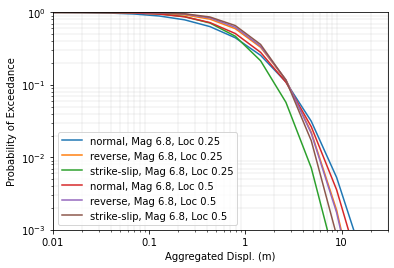

In [9]:
fig, ax = plt.subplots(1,1)

for scenario, group in results.groupby(["magnitude", "location", "style"]):
    _mag, _loc, _style = scenario[0], scenario[1], scenario[2]
    group = group.sort_values(by="displacement")
    label = f"{_style}, Mag {_mag}, Loc {_loc}"
    ax.plot(group["displacement"], group["probex_folded"], label=label)

xticks = [0.001, 0.01, 0.1, 1, 10, 100]
plt.minorticks_on()
ax.set_xticks(xticks)
ax.yaxis.set_tick_params(labelbottom=True)
ax.set(xlim=[0.01, 30], ylim=[1e-3, 1], xscale="log", yscale="log")
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
ax.grid(which="minor", axis="both", lw=0.4, alpha=0.5)
ax.set(xlabel="Aggregated Displ. (m)", ylabel="Probability of Exceedance")
ax.legend(loc="lower left")

Note that multiple scenarios *cannot* be run when the full model coefficients are used (i.e., `mean_model=False`):

In [10]:
try:
    results = run_probability_exceedance.run_probex(
        magnitude=[7, 7.2], location=0.5, style='normal', displacement=displ_array, mean_model=False
    )
except TypeError as e:
    print(e)

Only one value is allowed for 'magnitude' when `mean_model=False`, but user entered '[7, 7.2]', which is 2 values.


In [11]:
del fig, ax, xticks, mag, loc, sof, results, scenario, group, label

# Model epistemic uncertainty

The default uses the mean model coefficients. The full model coefficients can be obtained by setting `mean_model=False`. Here is an example.

In [12]:
mag, loc, sof = 6.8, 0.35, 'reverse'

results = run_probability_exceedance.run_probex(
    magnitude=mag, location=loc, style=sof, displacement=displ_array, mean_model=False
)

print(f"Number of test displacements: {len(displ_array)}")
print(
    f"Number of models (i.e., correlated coefficients) run: {max(results['model_number'])}"
)
print(f"Number of rows in output dataframe: {len(results)}")

results.head()

Number of test displacements: 20
Number of models (i.e., correlated coefficients) run: 1000
Number of rows in output dataframe: 20000


,magnitude,location,style,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,transformed_displacement,displacement,probex_site,probex_complement,probex_folded
0,6.8,0.35,reverse,1,0.112484,0.131563,0.833992,-0.168357,0.903354,-4.802658,0.001000,1.000000,1.000000,1.000000
1,6.8,0.35,reverse,1,0.112484,0.131563,0.833992,-0.168357,0.903354,-4.514345,0.001833,1.000000,0.999999,1.000000
2,6.8,0.35,reverse,1,0.112484,0.131563,0.833992,-0.168357,0.903354,-4.205695,0.003360,1.000000,0.999996,0.999998
3,6.8,0.35,reverse,1,0.112484,0.131563,0.833992,-0.168357,0.903354,-3.875275,0.006158,0.999999,0.999980,0.999989
4,6.8,0.35,reverse,1,0.112484,0.131563,0.833992,-0.168357,0.903354,-3.521548,0.011288,0.999994,0.999897,0.999946


Running all the coefficients provides a robust estimate of the epistemic uncertainty in the model.

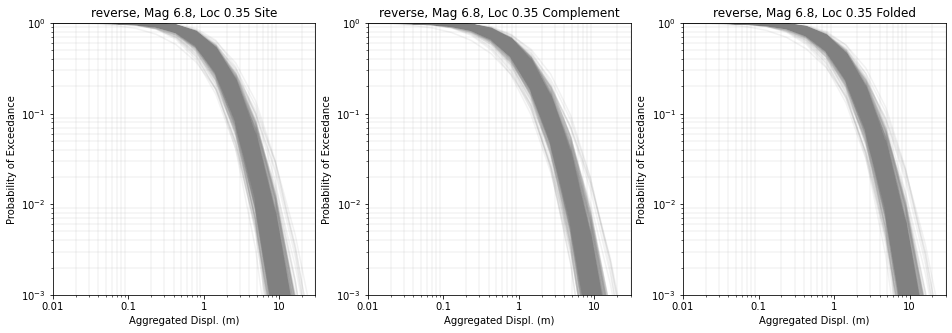

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

for run, group in results.groupby(["model_number"]):
    group = group.sort_values(by="displacement")
    axs[0].plot(group["displacement"], group["probex_site"], c="gray", alpha=0.1)
    axs[1].plot(group["displacement"], group["probex_complement"], c="gray", alpha=0.1)
    axs[2].plot(group["displacement"], group["probex_folded"], c="gray", alpha=0.1)


ax = [0, 1, 2]
label = ["Site", "Complement", "Folded"]
for _ax, _label in zip(ax, label):
    axs[_ax].set_title(f"{sof}, Mag {mag}, Loc {loc} {_label}")
xticks = [0.001, 0.01, 0.1, 1, 10, 100]
plt.minorticks_on()
for ax in axs:
    ax.set_xticks(xticks)
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.set(xlim=[0.01, 30], ylim=[1e-3, 1], xscale="log", yscale="log")
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
    ax.grid(which="minor", axis="both", lw=0.4, alpha=0.5)
    ax.set(xlabel="Aggregated Displ. (m)", ylabel="Probability of Exceedance")

Epistemic fracatiles can be computed. We will use [StatsModels](https://www.statsmodels.org/stable/index.html) here for convenience, but custom codes are easy to develop based on the workflows of the end-user.

In [14]:
from statsmodels.stats.weightstats import DescrStatsW

Define a function for easy application to the output Pandas DataFrame. 

In [15]:
def calc_weighted_statistics(dataframe, rate_column, fractiles):
    """
    Calculate weighted descriptive statistics for a given column using `DescrStatsW` from `statsmodels`.
    Note equal weighting is applied to each row here.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input dataframe containing the data to analyze.
    rate_column : str
        The column name in the dataframe containing the values to calculate statistics for.
    fractiles : list
        A list of fractiles (quantiles) to calculate for the given column.

    Returns
    -------
    info : pd.DataFrame
        A dataframe containing the calculated weighted statistics (mean and quantiles) for the given column.

    """

    stats = DescrStatsW(dataframe[rate_column])
    info = stats.quantile(fractiles)
    info["Mean"] = stats.mean

    return info

Convert the results from a wide format to long format:

In [16]:
cols1 = results.columns
cols2 = [col for col in cols1 if not col.startswith("probex")]

results_melted = pd.melt(results, id_vars=cols2, var_name="side", value_name="probex")

results_melted.head()

,magnitude,location,style,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,transformed_displacement,displacement,side,probex
0,6.8,0.35,reverse,1,0.112484,0.131563,0.833992,-0.168357,0.903354,-4.802658,0.001000,probex_site,1.000000
1,6.8,0.35,reverse,1,0.112484,0.131563,0.833992,-0.168357,0.903354,-4.514345,0.001833,probex_site,1.000000
2,6.8,0.35,reverse,1,0.112484,0.131563,0.833992,-0.168357,0.903354,-4.205695,0.003360,probex_site,1.000000
3,6.8,0.35,reverse,1,0.112484,0.131563,0.833992,-0.168357,0.903354,-3.875275,0.006158,probex_site,0.999999
4,6.8,0.35,reverse,1,0.112484,0.131563,0.833992,-0.168357,0.903354,-3.521548,0.011288,probex_site,0.999994


And compute the statistics using the function defined above:

In [17]:
statistics = (
    results_melted.groupby(["side", "displacement"])
    .apply(
        calc_weighted_statistics,
        rate_column="probex",
        fractiles=[0.02, 0.5, 0.98],
    )
    .reset_index()
)

statistics.head()

p,side,displacement,0.02,0.5,0.98,Mean
0,probex_complement,0.001000,0.999991,1.000000,1.000000,0.999999
1,probex_complement,0.001833,0.999973,1.000000,1.000000,0.999996
2,probex_complement,0.003360,0.999915,0.999998,1.000000,0.999987
3,probex_complement,0.006158,0.999727,0.999987,1.000000,0.999955
4,probex_complement,0.011288,0.999107,0.999932,0.999995,0.999836


And we can replot with the statistics:

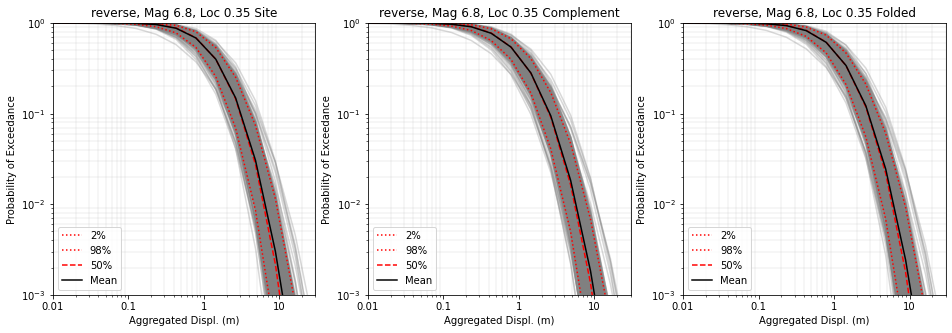

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

# Plot all hazard curves
for run, group in results.groupby(["model_number"]):
    group = group.sort_values(by="displacement")
    axs[0].plot(group["displacement"], group["probex_site"], c="gray", alpha=0.3)
    axs[1].plot(group["displacement"], group["probex_complement"], c="gray", alpha=0.3)
    axs[2].plot(group["displacement"], group["probex_folded"], c="gray", alpha=0.3)

# Plot epistemic fractiles
ax = [0, 1, 2]
cols = ["probex_site", "probex_complement", "probex_folded"]
for _ax, _side in zip(ax, cols):
    subset_statistics = statistics[statistics["side"] == _side]
    axs[_ax].plot(
        subset_statistics["displacement"],
        subset_statistics[0.02],
        c="red",
        label="2%",
        ls="dotted",
    )
    axs[_ax].plot(
        subset_statistics["displacement"],
        subset_statistics[0.98],
        c="red",
        label="98%",
        ls="dotted",
    )
    axs[_ax].plot(
        subset_statistics["displacement"],
        subset_statistics[0.5],
        c="red",
        label="50%",
        ls="dashed",
    )
    axs[_ax].plot(
        subset_statistics["displacement"],
        subset_statistics["Mean"],
        c="black",
        label="Mean",
        ls="solid",
    )

# Formatting
ax = [0, 1, 2]
label = ["Site", "Complement", "Folded"]
for _ax, _label in zip(ax, label):
    axs[_ax].set_title(f"{sof}, Mag {mag}, Loc {loc} {_label}")
xticks = [0.001, 0.01, 0.1, 1, 10, 100]
plt.minorticks_on()
for ax in axs:
    ax.set_xticks(xticks)
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.set(xlim=[0.01, 30], ylim=[1e-3, 1], xscale="log", yscale="log")
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
    ax.grid(which="minor", axis="both", lw=0.4, alpha=0.5)
    ax.set(xlabel="Aggregated Displ. (m)", ylabel="Probability of Exceedance")
    ax.legend(loc="lower left")